In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

In [2]:
df_raw = pd.read_csv('./Data/3. Big Data 분석/FITNESS_결측.csv', encoding='euc-kr')
df_raw

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


In [3]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [4]:
df_raw['GENDER'].fillna("여성", inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [5]:
df_raw.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [6]:
df_raw.groupby('GENDER')['WEIGHT'].transform('mean')

0     72.908750
1     72.908750
2     72.908750
3     72.908750
4     82.433077
5     82.433077
6     72.908750
7     72.908750
8     72.908750
9     72.908750
10    82.433077
11    72.908750
12    72.908750
13    82.433077
14    82.433077
15    72.908750
16    82.433077
17    72.908750
18    82.433077
19    82.433077
20    72.908750
21    72.908750
22    82.433077
23    82.433077
24    72.908750
25    82.433077
26    72.908750
27    82.433077
28    82.433077
29    82.433077
30    82.433077
Name: WEIGHT, dtype: float64

In [7]:
df_raw['WEIGHT'] = df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform('mean')).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


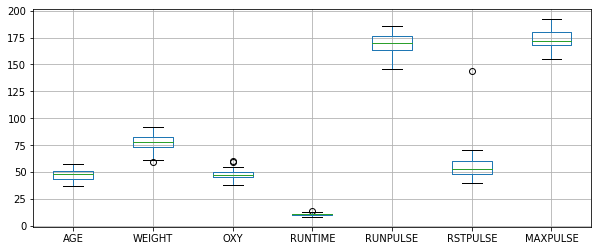

In [8]:
df_raw.boxplot(figsize=(10,4))

In [9]:
df_raw['RSTPULSE'] >= 100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [10]:
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [11]:
df_raw[(df_raw['RSTPULSE'] >= 100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [12]:
df_fitness = df_raw[df_raw['RSTPULSE'] < 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [13]:
df_fitness.reset_index(drop=True, inplace=True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [14]:
df_fitness_num = df_fitness.select_dtypes(exclude='object')
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [15]:
df_fitness_char = df_fitness.select_dtypes(include='object')
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [16]:
df_scale_std = scale(df_fitness_num)
df_scale_std = pd.DataFrame(df_scale_std, columns=df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [17]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [18]:
df_scale_minmax = minmax_scale(df_fitness_num)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns=df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [19]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [20]:
df_scale_robust = robust_scale(df_fitness_num)
df_scale_robust = pd.DataFrame(df_scale_robust, columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [21]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.112500,0.017371,0.122671,0.075502,-0.022222,0.117829,0.152778
std,0.725609,0.867508,1.019887,0.924652,0.772046,0.701538,0.776228
min,-1.312500,-1.910818,-1.892003,-1.535284,-1.777778,-1.162791,-1.416667
25%,-0.562500,-0.404593,-0.364587,-0.478485,-0.555556,-0.418605,-0.333333


In [22]:
df_rstpulse = pd.DataFrame()
df_rstpulse['Raw'] = df_fitness_num['RSTPULSE']
df_rstpulse['Standard'] = df_scale_std['RSTPULSE']
df_rstpulse['MinMax'] = df_scale_minmax['RSTPULSE']
df_rstpulse['Robust'] = df_scale_robust['RSTPULSE']
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [23]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc44ce0bd10>,
      dtype=object)

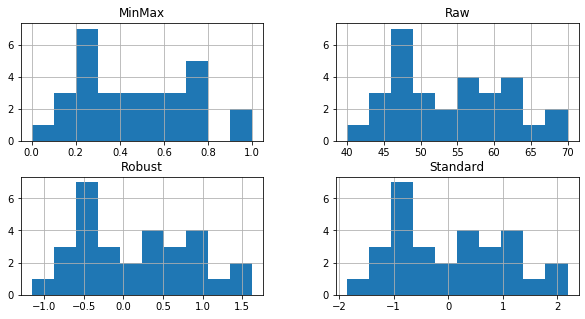

In [24]:
df_rstpulse[['Raw', 'Standard', 'MinMax', 'Robust']].hist(figsize=(10,5))

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [75]:
matplotlib.rc('font',family='NanumBarunGothic')

In [41]:
df_fitness = pd.read_csv('./Data/3. Big Data 분석/FITNESS.csv', encoding='cp949')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [42]:
df_currency = pd.read_csv('./Data/3. Big Data 분석/환율.csv')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


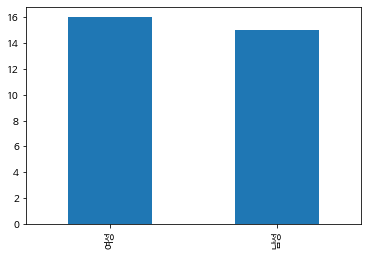

In [76]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

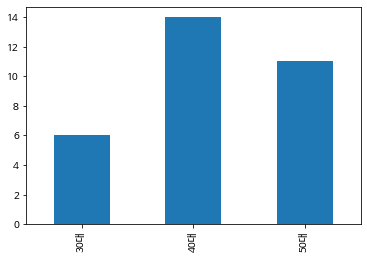

In [48]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

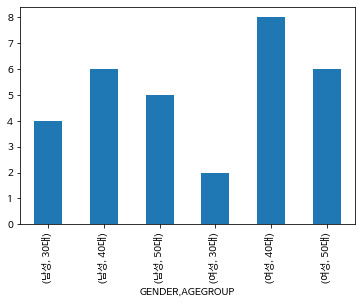

In [52]:
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index=False).size()
df_groupby_total.plot.bar()

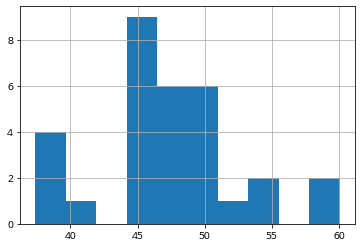

In [53]:
df_fitness['OXY'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc44aae3510>,
      dtype=object)

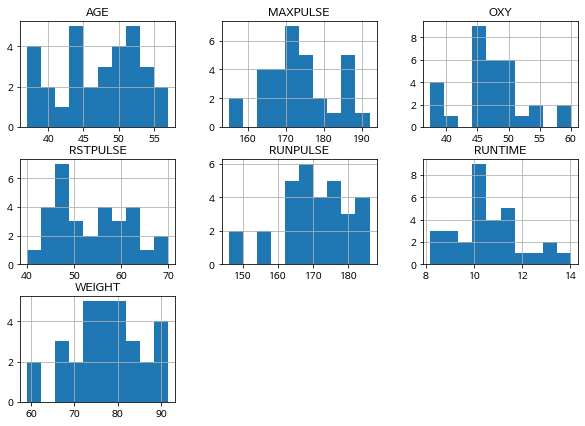

In [54]:
df_fitness.hist(figsize=(10,7))

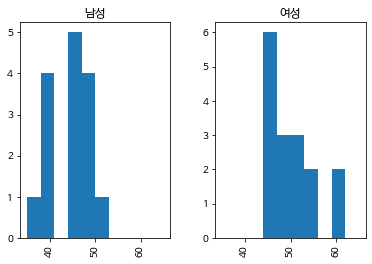

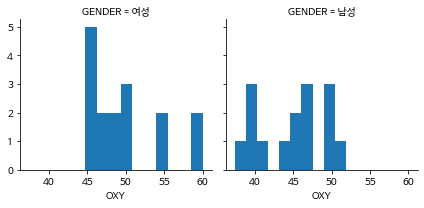

In [55]:
df_fitness.hist(column="OXY", by='GENDER', range=(35,65))
grid = sns.FacetGrid(df_fitness, col='GENDER')
grid.map(plt.hist, "OXY")

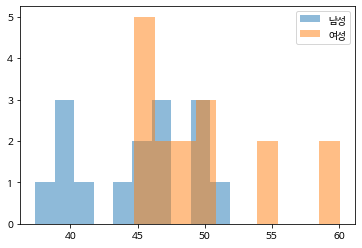

In [56]:
plt.hist(df_fitness[df_fitness['GENDER']=='남성']['OXY'], label="남성", alpha=0.5)
plt.hist(df_fitness[df_fitness['GENDER']=='여성']['OXY'], label="여성", alpha=0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

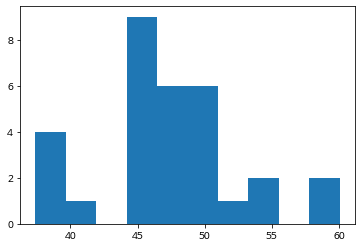

In [57]:
plt.hist(x='OXY', data=df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

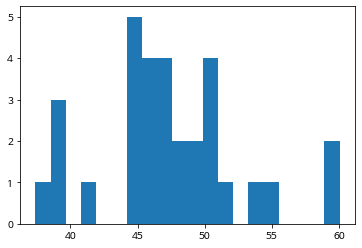

In [58]:
plt.hist(x="OXY", data=df_fitness, bins=20)

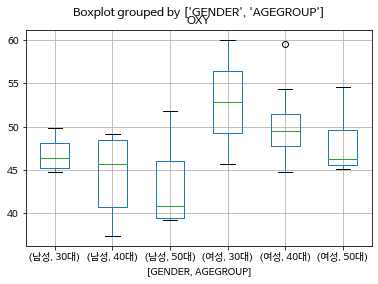

In [59]:
df_fitness.boxplot(column="OXY", by=['GENDER', 'AGEGROUP'])

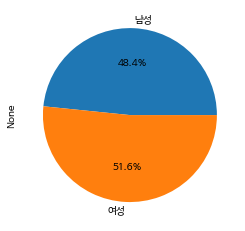

In [60]:
df_count = df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y='OXY', autopct='%.1f%%')

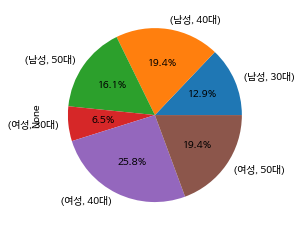

In [61]:
df_count = df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_count.plot.pie(y='OXY', autopct="%.1f%%")

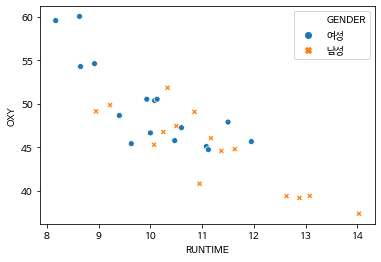

In [62]:
sns.scatterplot(x='RUNTIME', y='OXY', hue='GENDER', style='GENDER', data=df_fitness)

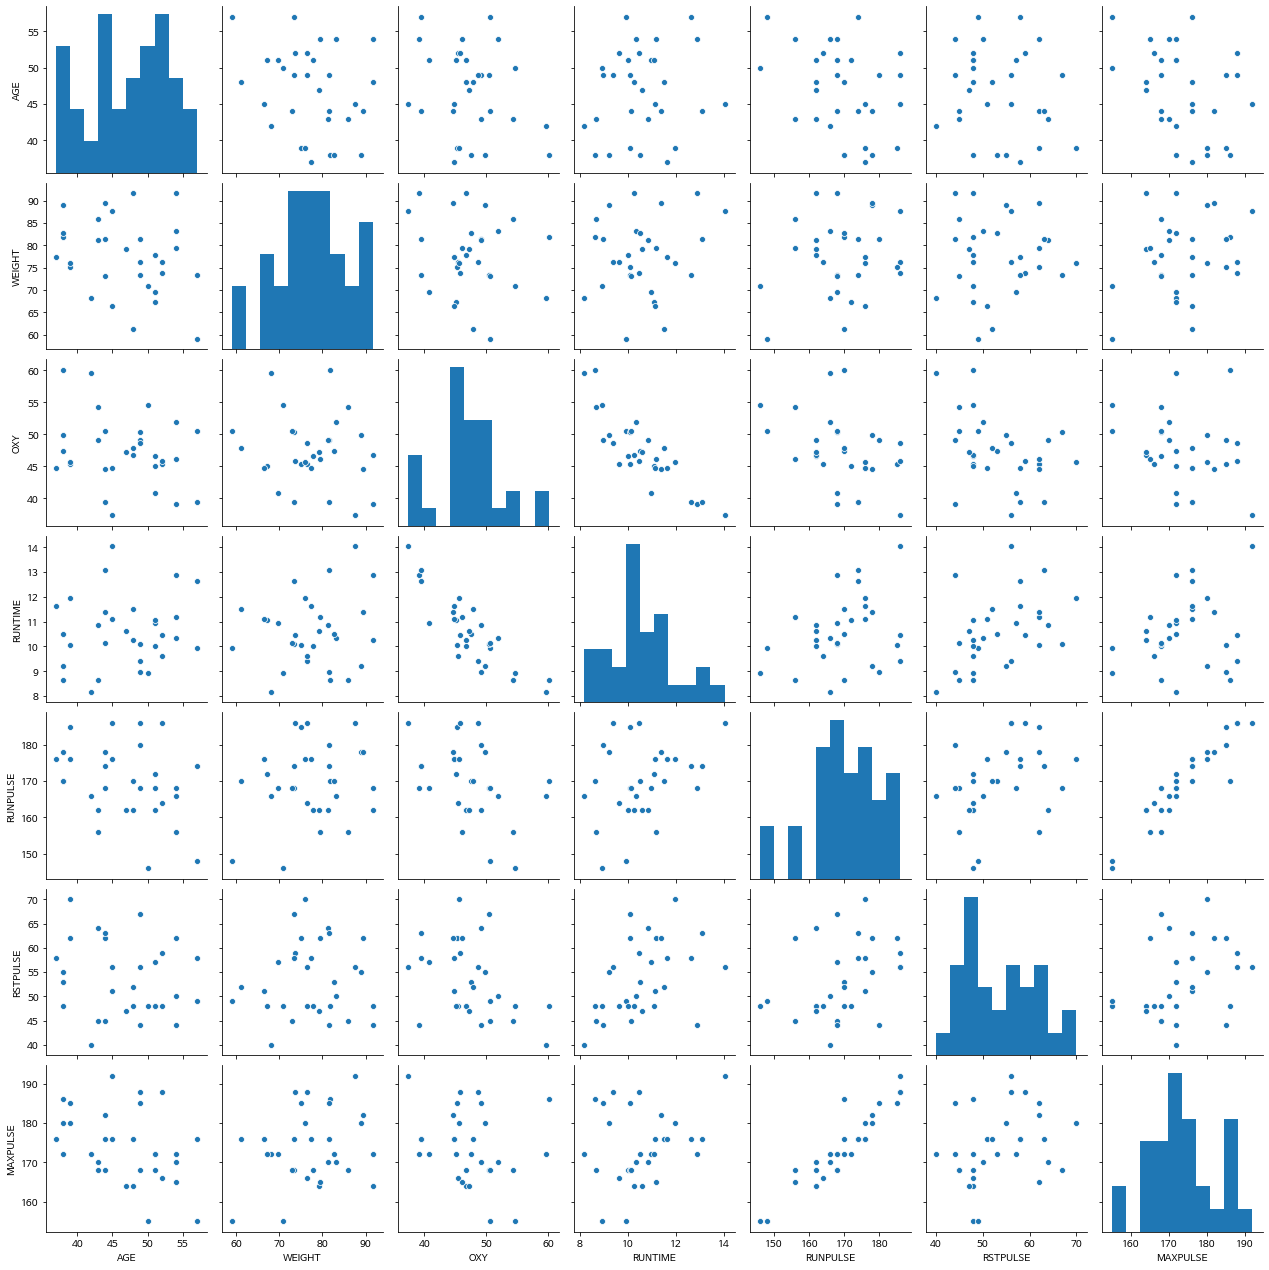

In [63]:
sns.pairplot(df_fitness)

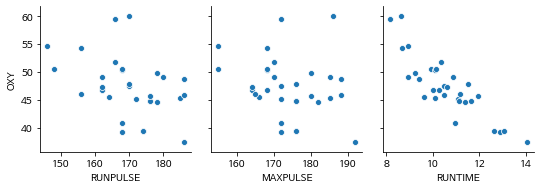

In [64]:
sns.pairplot(df_fitness, y_vars=['OXY'], x_vars=['RUNPULSE', "MAXPULSE","RUNTIME"])

In [65]:
df_currency_pivot = df_currency.pivot(index="APPL_DATE", columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
20160101,181.48,976.99,1178.0
20160102,181.48,976.99,1178.0
20160103,181.48,976.99,1178.0
20160104,181.10,992.62,1184.0
20160105,181.94,993.00,1185.0


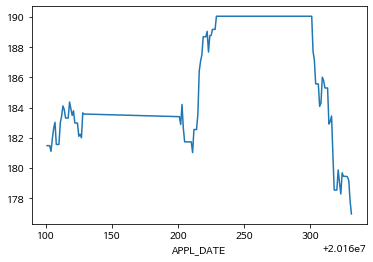

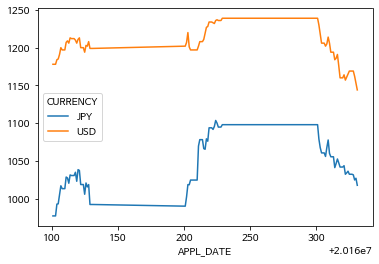

In [66]:
df_currency_pivot['CNY'].plot()
df_currency_pivot[['JPY', "USD"]].plot()

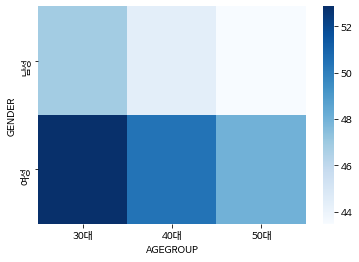

In [69]:
df_agg = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index=False).agg('mean')
df_pivot = df_agg.pivot('GENDER', 'AGEGROUP', 'OXY')
sns.heatmap(df_pivot, cmap='Blues')

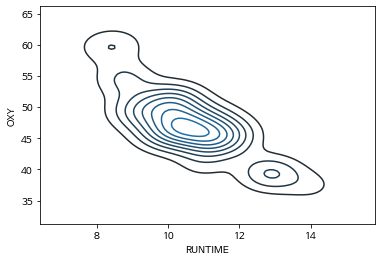

In [70]:
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'], shade=False)

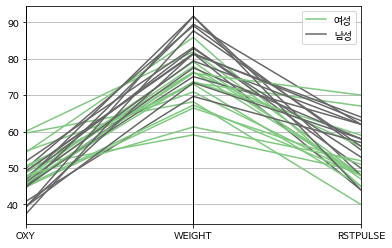

In [71]:
pd.plotting.parallel_coordinates(df_fitness, 'GENDER', cols=['OXY', 'WEIGHT', 'RSTPULSE'], colormap='Accent')

Text(486.9227272727271, 0.5, '혈당 산소 요구량')

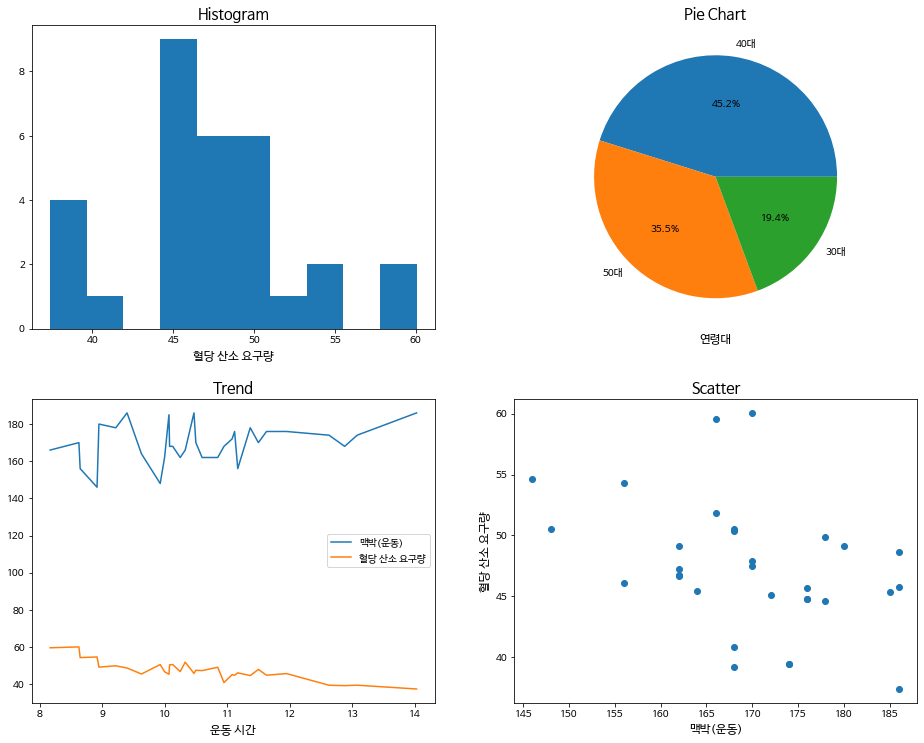

In [72]:
df_count = df_fitness['AGEGROUP'].value_counts()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)

axes[0,0].hist(df_fitness['OXY'])
axes[0,0].set_title('Histogram', fontsize=15)
axes[0,0].set_xlabel('혈당 산소 요구량', fontsize=12)

axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct='%.1f%%')
axes[0,1].set_title('Pie Chart', fontsize=15)
axes[0,1].set_xlabel('연령대', fontsize=12)

axes[1,0].plot('RUNTIME', 'RUNPULSE', data=df_fitness, label='맥박(운동)')
axes[1,0].plot('RUNTIME', 'OXY', data=df_fitness, label='혈당 산소 요구량')
axes[1,0].set_title('Trend', fontsize=15)
axes[1,0].set_xlabel('운동 시간', fontsize=12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE", "OXY", data=df_fitness)
axes[1,1].set_title('Scatter', fontsize=15)
axes[1,1].set_xlabel('맥박(운동)', fontsize=12)
axes[1,1].set_ylabel('혈당 산소 요구량', fontsize=12)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.72e-64
Time:                        18:38:25   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

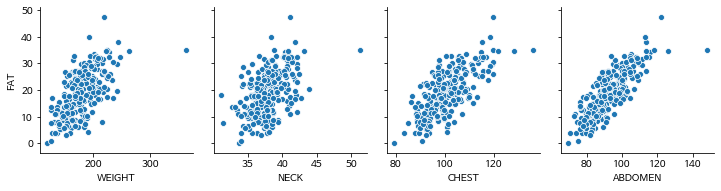

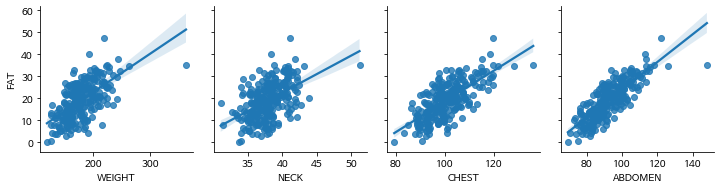

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


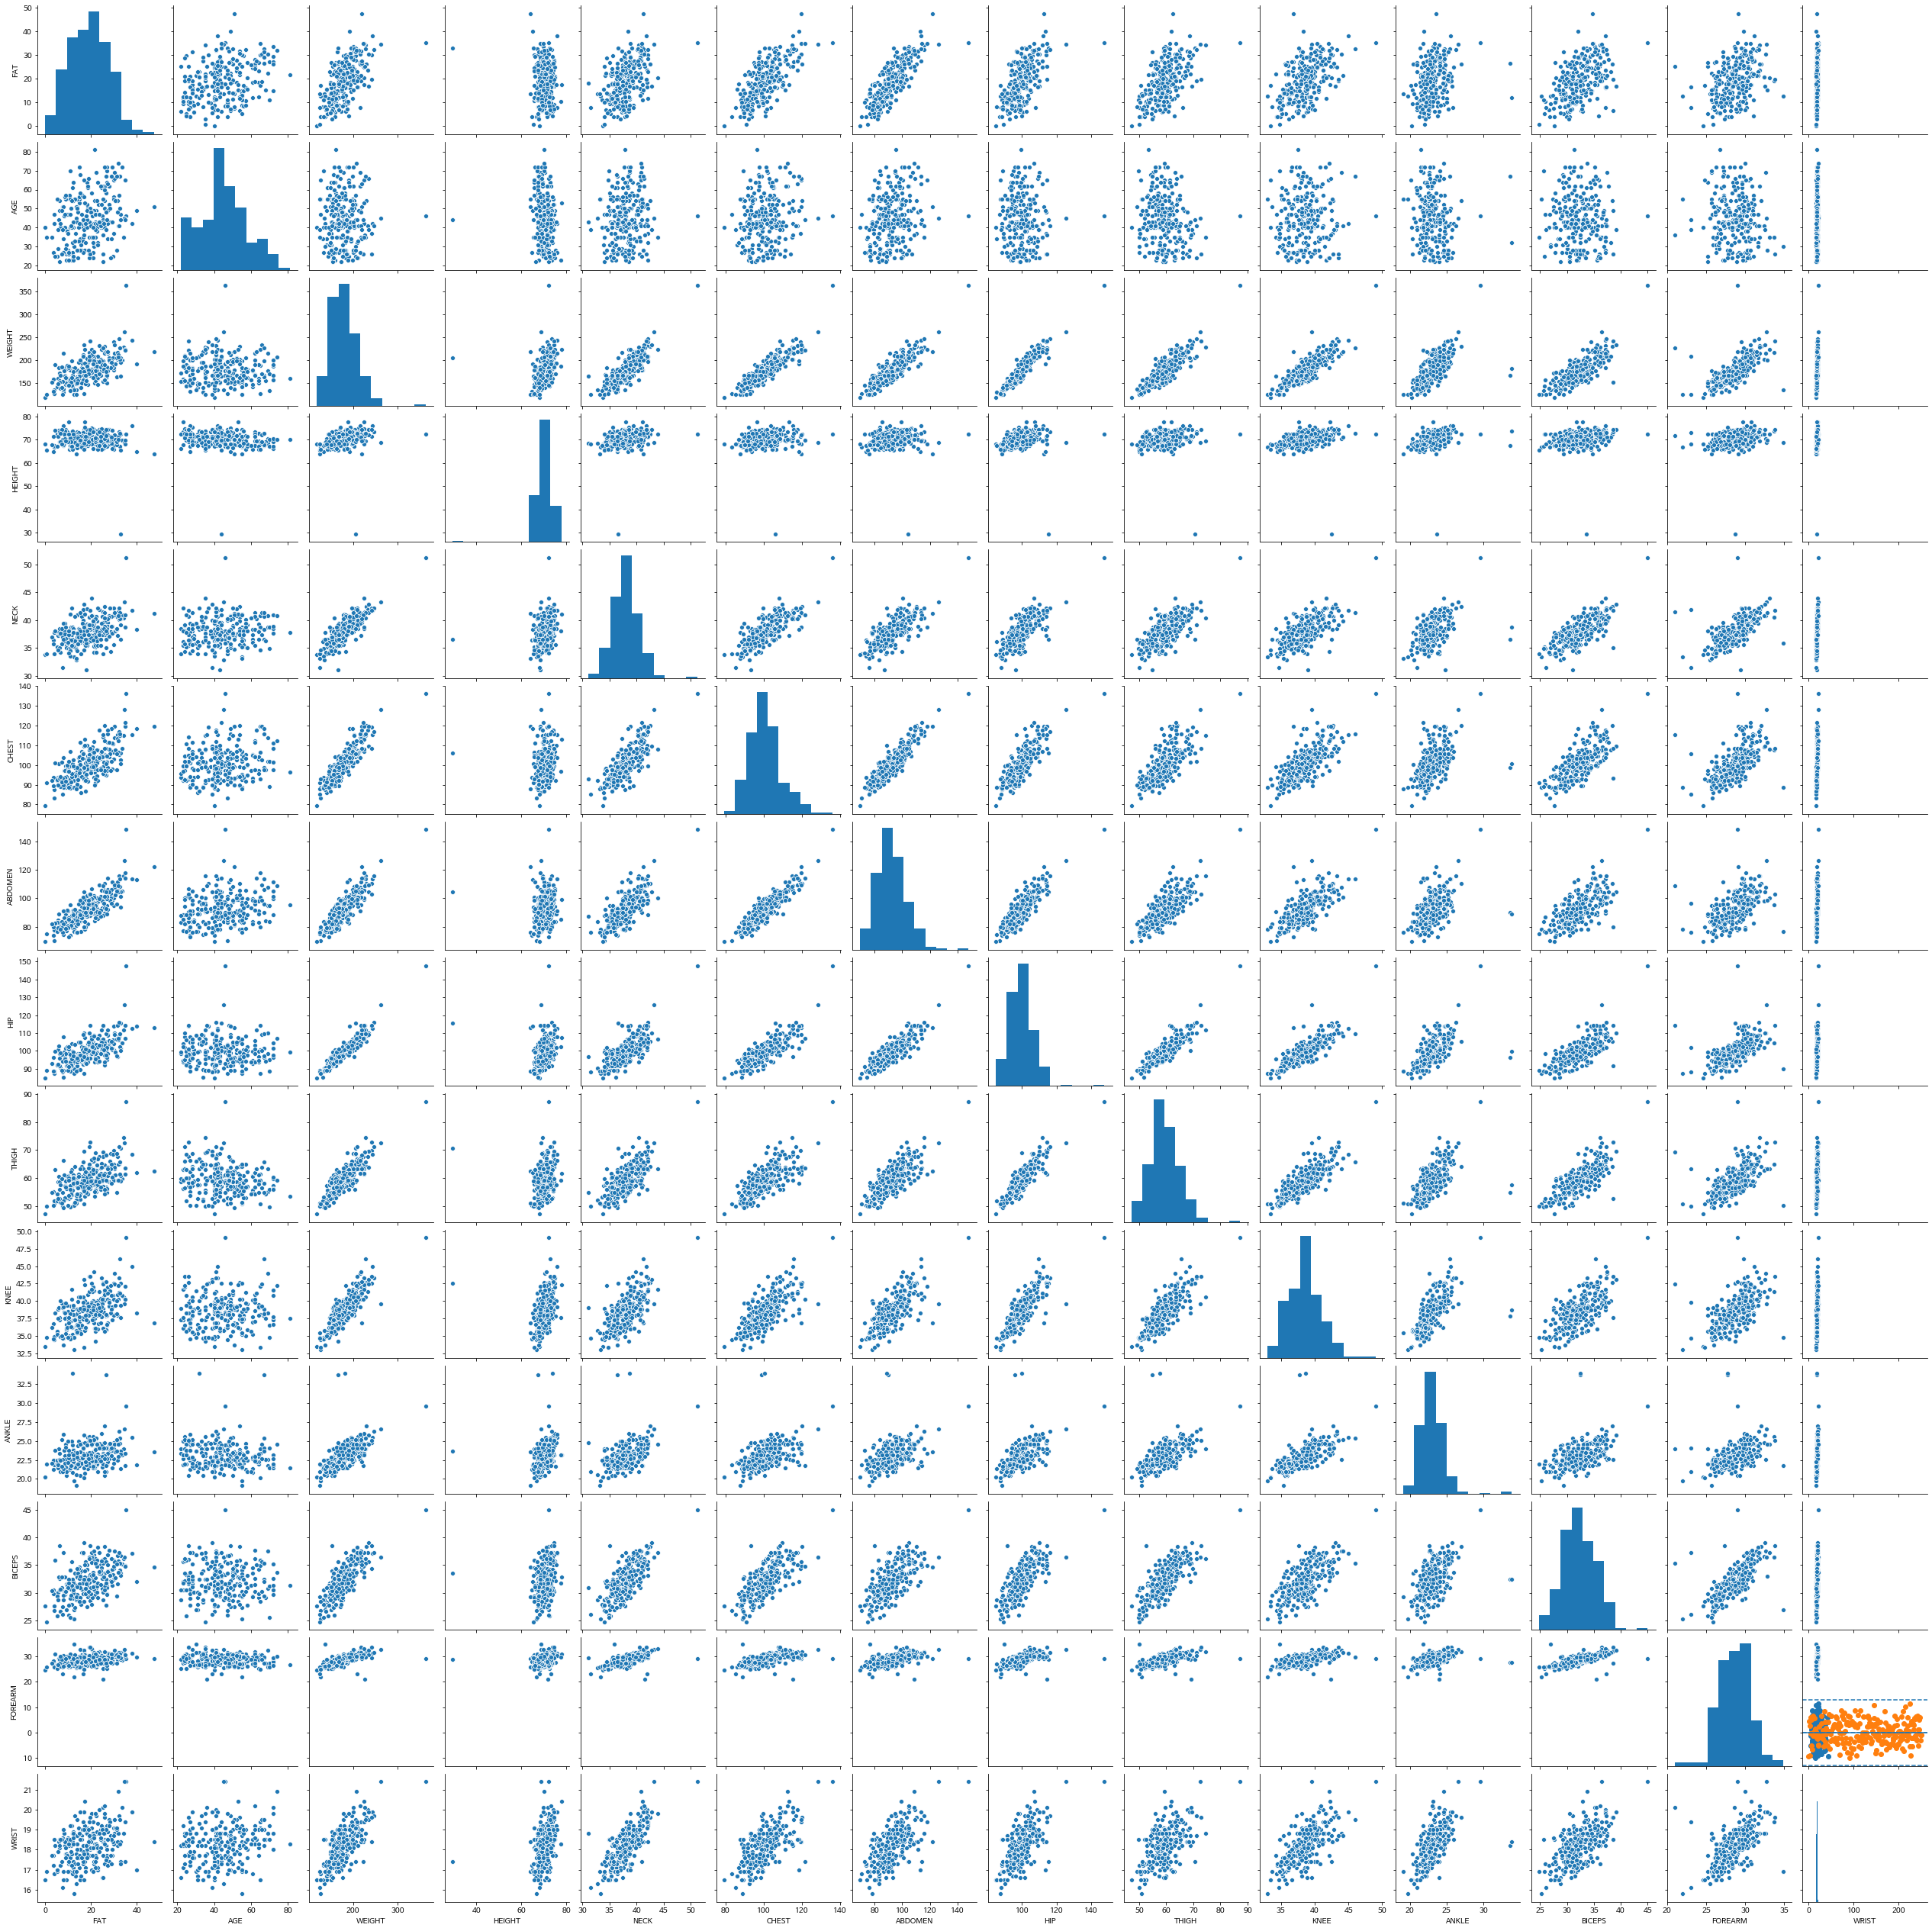

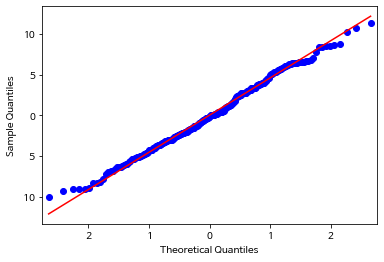

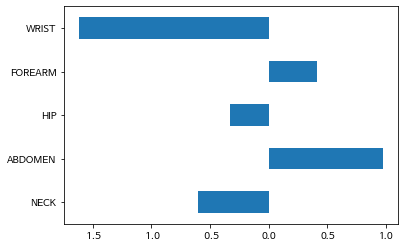

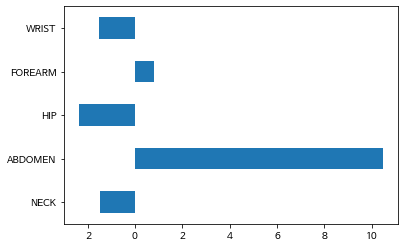

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

 

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

 

%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
 
matplotlib.rc('font',family='NanumBarunGothic')
 
df_raw=pd.read_csv("./Data/3. Big Data 분석/체질검사.csv",engine="python",encoding="euc-kr")
df_raw.head()
#산점도 행렬
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"])
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"],kind="reg")
# 회귀 적합선 추가
sns.pairplot(df_raw)
#상관관계 분석
df_raw.corr().round(3)

#선형 회귀분석
reg_model=smf.ols(formula="FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())
 


#다중공선성 확인
df_raw_x=df_raw.drop("FAT",axis=1)

 

df_raw_x_const=add_constant(df_raw_x)

 

df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

 

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

#다중 공선성 재확인
df_raw_x=df_raw.drop(["FAT","WEIGHT"],axis=1)

 

df_raw_x_const=add_constant(df_raw_x)

 

df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

 

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)
 

reg_model=smf.ols(formula="FAT~AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST",data=df_raw)

 

reg_result=reg_model.fit()
print(reg_result.summary())
 

#후진제거법
df_raw_y=df_raw["FAT"]

 

model=LinearRegression()

 

rfe=RFE(estimator=model,n_features_to_select=5).fit(df_raw_x,df_raw_y)

 

selected_cols=df_raw_x.columns[rfe.support_]

 

removed_cols=df_raw_x.columns[~rfe.support_]

 

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

#후진제거법 이후 회귀모델 생성
rfe_reg_model=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST",data=df_raw)

 

rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

#잔차 산점도:X-예측값, Y-잔차
plt.scatter(rfe_reg_result.fittedvalues,rfe_reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

 

#잔차의 독립성 확인
plt.scatter(df_raw.index,rfe_reg_result.resid,marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="-")
plt.axhline(y=3*np.std(rfe_reg_result.resid),linestyle="--")
plt.axhline(y=-3*np.std(rfe_reg_result.resid),linestyle="--")

 

#잔차 정규성검정
qqplot(rfe_reg_result.resid,line="q")
# 정규성 검정
from statsmodels.stats.stattools import omni_normtest
omni_normtest(rfe_reg_result.resid,axis=0)
#정규분포 직선(적색 선)을 중심으로 분포하고 검정 통계량이 귀무가설을 채택하므로 정규분포를 따름
#비표준화 회귀계수
df_reg_coef=pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)

#표준화 회귀계수
scaler=StandardScaler()

 

cols=df_raw_x.columns

 

np_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled, columns=cols)

 

df_scaled["FAT"]=df_raw["FAT"]
reg_model_scaled=smf.ols(formula = "FAT ~ NECK+ABDOMEN + HIP+FOREARM+WRIST",data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

 

df_reg_coef=pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           7.72e-64
Time:                        19:23:43   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


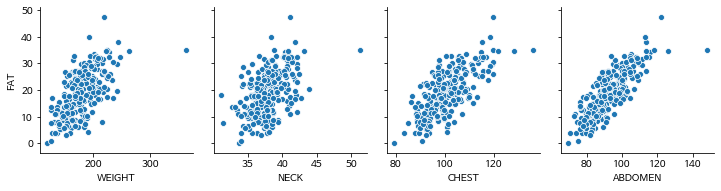

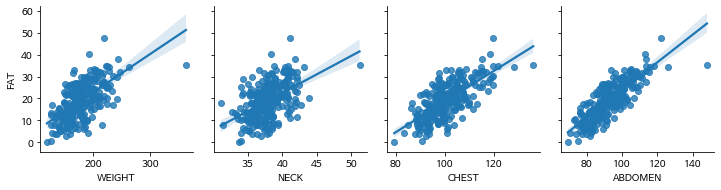

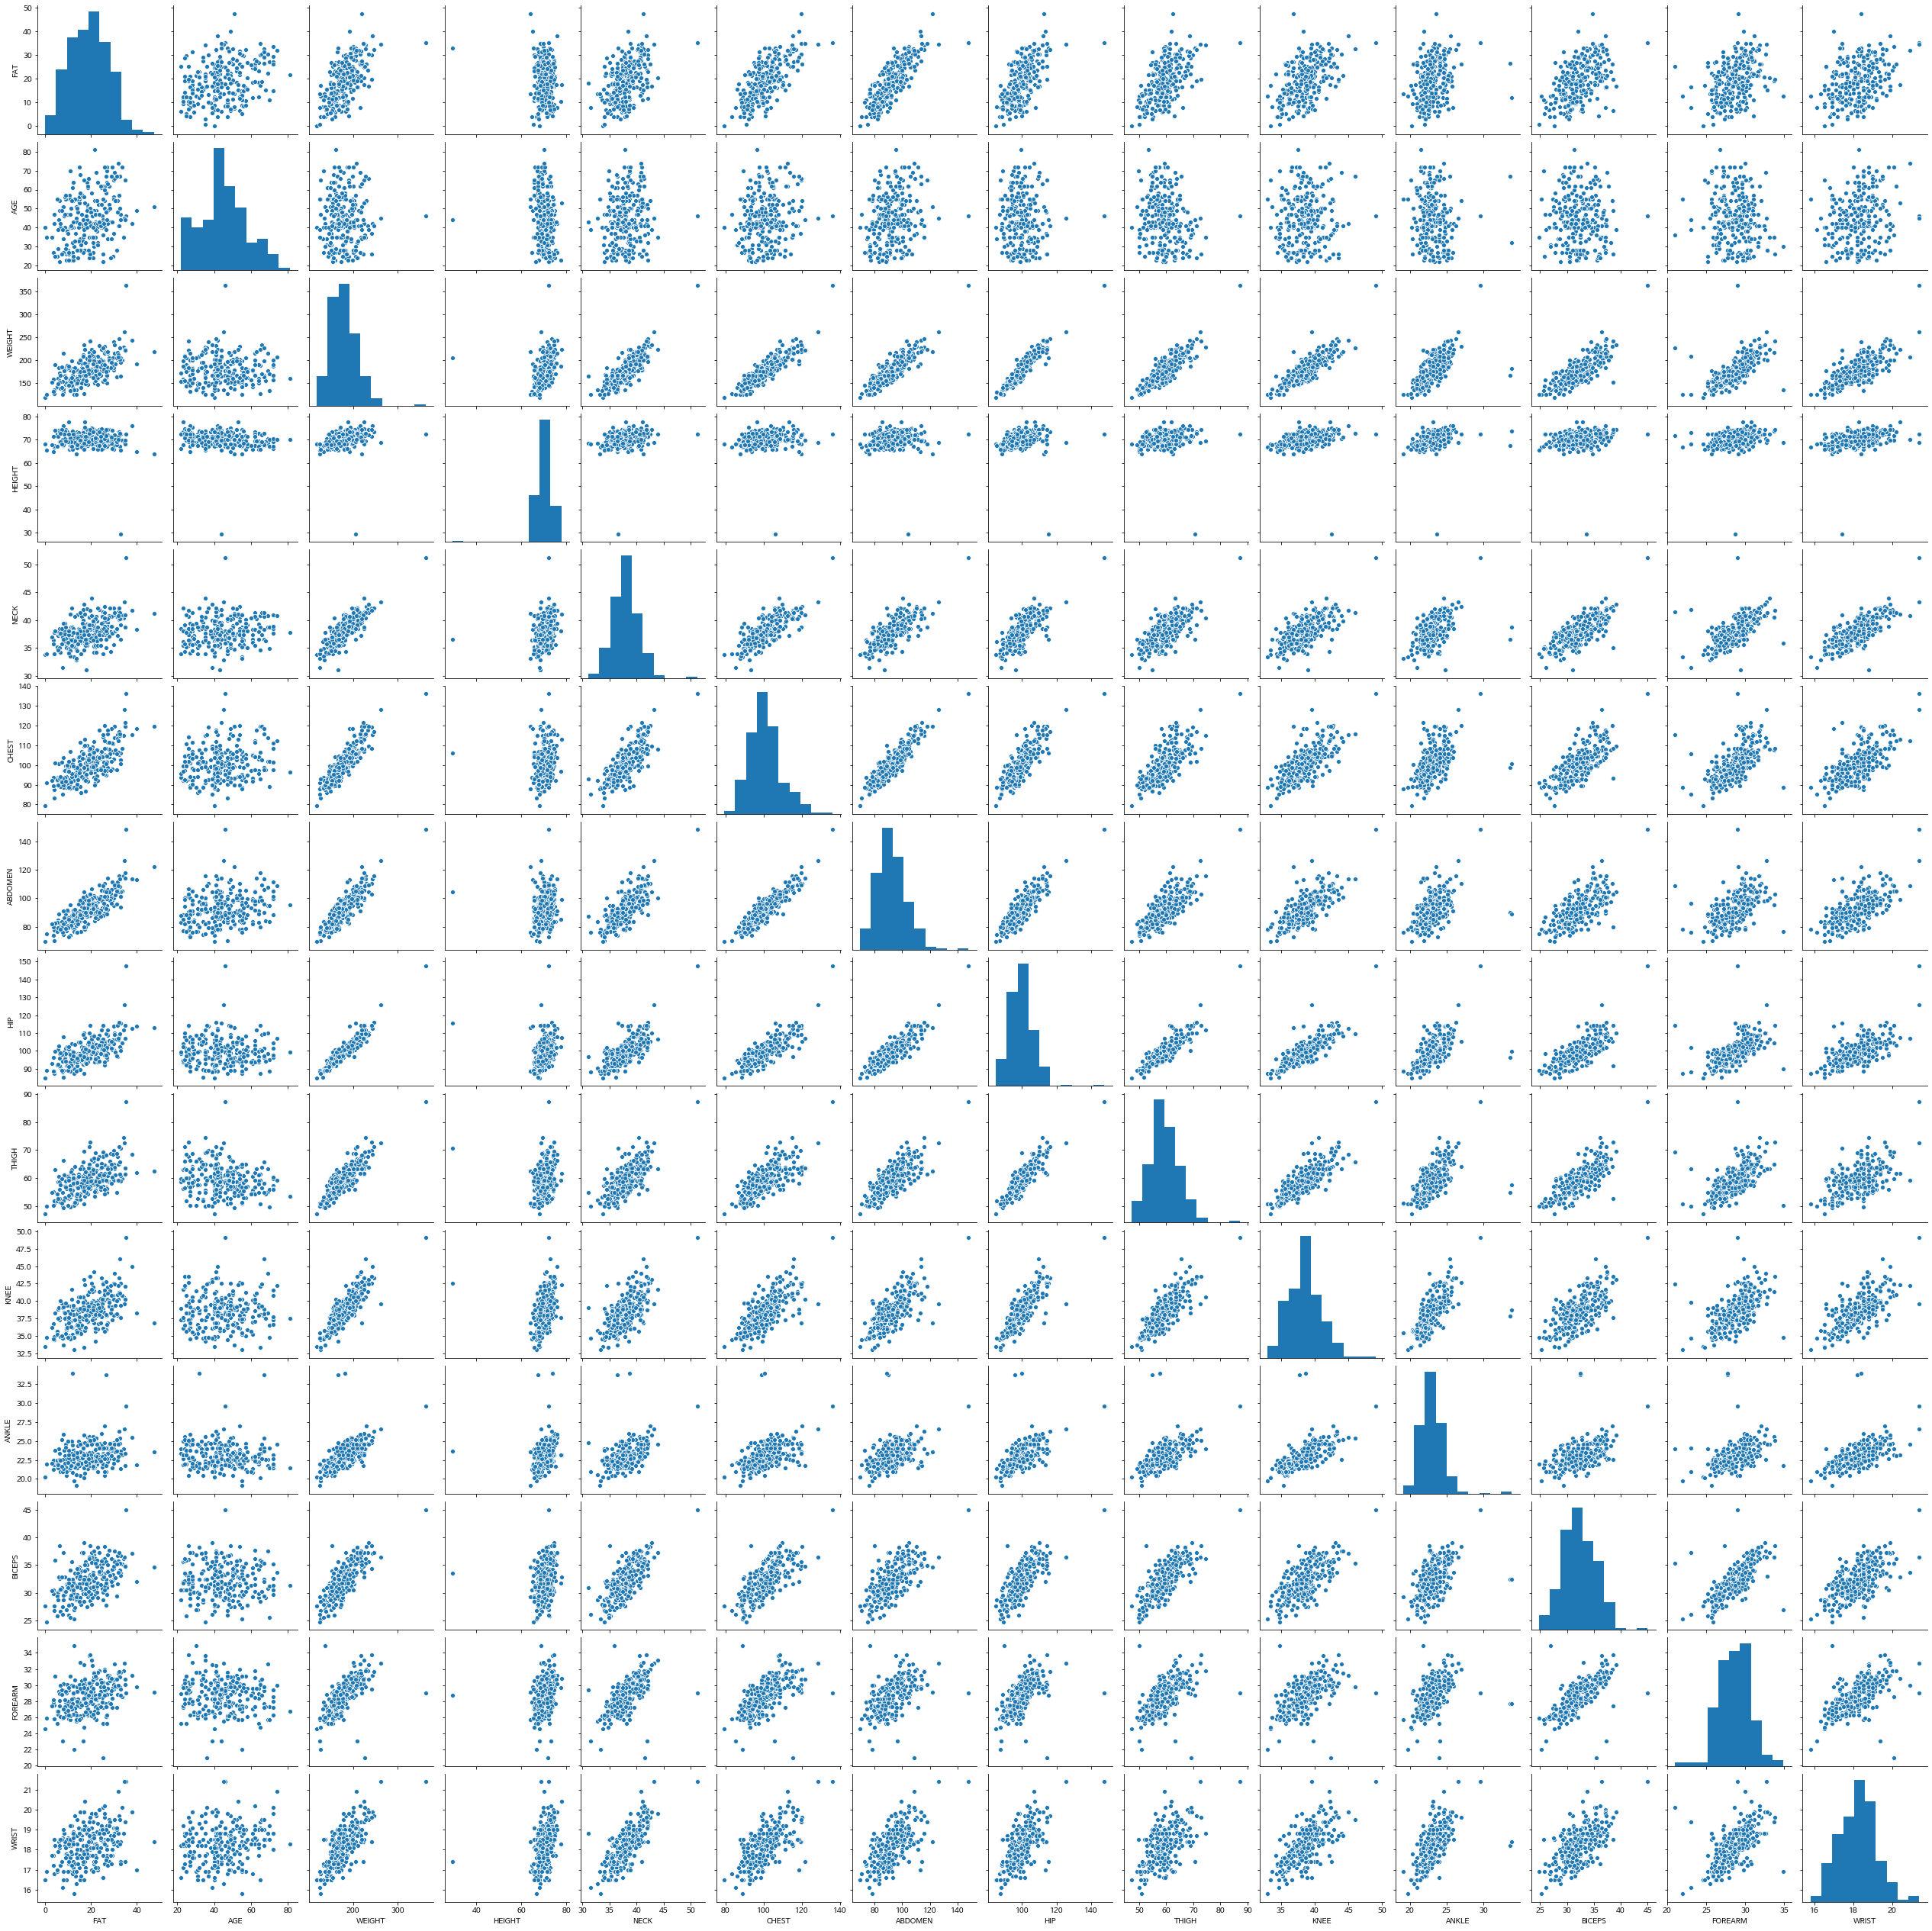

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

 

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

 

%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
 
matplotlib.rc('font',family='NanumBarunGothic')
 
df_raw=pd.read_csv("./Data/3. Big Data 분석/체질검사.csv",engine="python",encoding="euc-kr")
df_raw.head()
#산점도 행렬
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"])
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"],kind="reg")
# 회귀 적합선 추가
sns.pairplot(df_raw)
#상관관계 분석
df_raw.corr().round(3)

#선형 회귀분석
reg_model=smf.ols(formula="FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST",data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())
 


#다중공선성 확인
df_raw_x=df_raw.drop("FAT",axis=1)

 

df_raw_x_const=add_constant(df_raw_x)

 

df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

 

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

In [9]:
#다중 공선성 재확인
df_raw_x=df_raw.drop(["FAT","WEIGHT"],axis=1)

 

df_raw_x_const=add_constant(df_raw_x)

 

df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

 

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883
